In [5]:
#基于sklearn自带数据集进行鸢尾花分类的数据预处理

from sklearn import datasets
from sklearn.datasets import load_iris
import pandas as pd
from pandas import DataFrame
 
x_data=datasets.load_iris().data # .data返回iris数据集所有输入特征
y_data=datasets.load_iris().target # .target返回iris数据集所有标签
print("x_data from datasets:\n",x_data)
print("y_data from datasets:\n",y_data)

x_data=DataFrame(x_data,columns=['花萼长度','花萼宽度','花瓣长度','花瓣宽度']) #为每一列增加中文标签
pd.set_option('display.unicode.east_asian_width',True) #设置列对齐
print("x_data add index:\n",x_data)

x_data['类别']=y_data  #新增加一列，列标签为‘类别’，数据为y_data
print("x_data add column:\n",x_data)

x_data from datasets:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.

Epoch500,loss:0.2821310982108116
Test_acc: 0.16666666666666666
-----------------------------------------------
Epoch500,loss:0.25459615513682365
Test_acc: 0.16666666666666666
-----------------------------------------------
Epoch500,loss:0.22570249810814857
Test_acc: 0.16666666666666666
-----------------------------------------------
Epoch500,loss:0.21028399839997292
Test_acc: 0.16666666666666666
-----------------------------------------------
Epoch500,loss:0.19942265003919601
Test_acc: 0.16666666666666666
-----------------------------------------------
Epoch500,loss:0.18873637914657593
Test_acc: 0.2222222222222222
-----------------------------------------------
Epoch500,loss:0.17851299047470093
Test_acc: 0.26666666666666666
-----------------------------------------------
Epoch500,loss:0.16922875493764877
Test_acc: 0.3
-----------------------------------------------
Epoch500,loss:0.16107673197984695
Test_acc: 0.32592592592592595
-----------------------------------------------
Epoch500,l

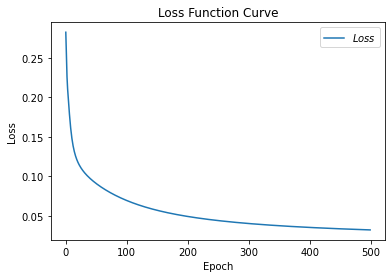

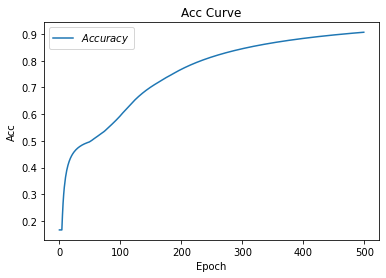

In [20]:
#利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线
##!/usr/bin/python
# -*- coding: UTF-8 -*- 
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
#导入数据集
x_data=datasets.load_iris().data
y_data=datasets.load_iris().target
#随机打乱数据
np.random.seed(116) #使用相同的随机数种子，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
#将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train=x_data[:-30]
y_train=y_data[:-30]
x_test=x_data[-30:]
y_test=y_data[-30:]
#转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train=tf.cast(x_train,tf.float32)
x_test=tf.cast(x_test,tf.float32)
#from_tensor_slices函数使输入特征和标签值一一对应。（把数据分批次，每个批次batch组数据）
train_db=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)
#生成神经网络的参数，输入层为4个输入节点，输出层为3个神经元
w1=tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1,seed=1))
b1=tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1))

Ir=0.1 #学习率为0.1
train_loss_results=[] #记录每轮的loss
train_acc=[] #记录每轮的acc
test_acc=[] #记录测试的acc
epoch=500 #循环500轮
loss_all=0 #每轮分为4个step，记录四个step生成的4个loss和
total_correct=0 #记录每轮的正确分类数量
total_number=0
#训练部分
for each in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y=tf.matmul(x_train,w1)+b1
            y=tf.nn.softmax(y)
            y_=tf.one_hot(y_train,depth=3)
            loss=tf.reduce_mean(tf.square(y_-y)) #采用均方误差损失函数
            loss_all+=loss.numpy()
        grads=tape.gradient(loss,[w1,b1])
        #实现梯度更新
        w1.assign_sub(Ir*grads[0])
        b1.assign_sub(Ir*grads[1])
    #每个epoch打印loss信息
    print("Epoch{},loss:{}".format(epoch,loss_all/4))
    train_loss_results.append(loss_all/4)
    #loss_all归零，为下一个epoch做准备
    loss_all=0
    #测试部分
    for x_test,y_test in test_db:
        #使用更新后的参数进行预测
        y=tf.matmul(x_test,w1)+b1
        y=tf.nn.softmax(y)
        pred=tf.argmax(y,axis=1) #返回y中的最大值的索引作为预测分类
        pred=tf.cast(pred,dtype=y_test.dtype)
        correct=tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
        correct=tf.reduce_sum(correct)
        total_correct+=int(correct)
        total_number+=x_test.shape[0]
    acc=total_correct/total_number
    test_acc.append(acc)
    print("Test_acc:",acc)
    print("-----------------------------------------------")
    
#绘制loss曲线
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results,label="$Loss$")
plt.legend()
plt.show()
#绘制accuracy曲线
plt.title('Acc Curve')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(test_acc,label='$Accuracy$')
plt.legend()
plt.show()

Epoch 1/15
60000/60000 [==============================] - 56s 936us/step - loss: 6.9021 - accuracy: 0.1934
Epoch 2/15
60000/60000 [==============================] - 56s 934us/step - loss: 1.7849 - accuracy: 0.3896
Epoch 3/15
60000/60000 [==============================] - 57s 953us/step - loss: 1.3012 - accuracy: 0.5666
Epoch 4/15
60000/60000 [==============================] - 57s 944us/step - loss: 1.0486 - accuracy: 0.6649
Epoch 5/15
60000/60000 [==============================] - 58s 973us/step - loss: 0.6670 - accuracy: 0.7886
Epoch 6/15
60000/60000 [==============================] - 57s 954us/step - loss: 0.6307 - accuracy: 0.8138
Epoch 7/15
60000/60000 [==============================] - 59s 981us/step - loss: 0.3298 - accuracy: 0.9016
Epoch 8/15
60000/60000 [==============================] - 58s 972us/step - loss: 0.4254 - accuracy: 0.8760
Epoch 9/15
60000/60000 [==============================] - 58s 963us/step - loss: 0.2941 - accuracy: 0.9127
Epoch 10/15
60000/60000 [============

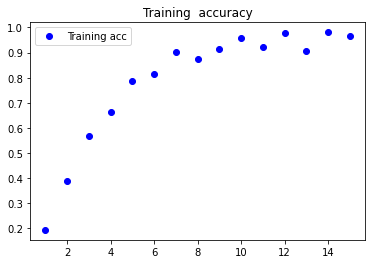

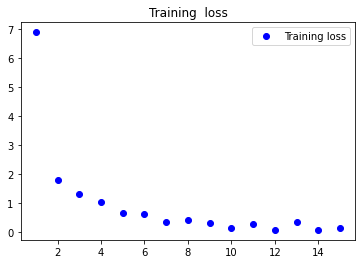

dict_keys(['loss', 'accuracy'])
10000/10000 [==============================] - 2s 221us/step
[0.15499131675232203, 0.9513999819755554]


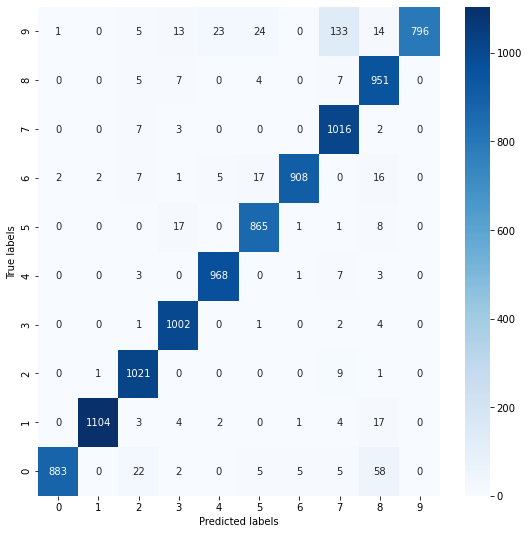

In [30]:
#利用卷积神经网络实现MNIST数据集分类
#!/usr/bin/python
#coding:utf-8
import numpy as np
from keras import layers
from keras import models
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

#导入MNIST数据集
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#转化为二维矩阵

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(state)
np.random.shuffle(y_train)

def to_one_hot(labels,dimension=10):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results
one_hot_train_labels = to_one_hot(y_train)
one_hot_test_labels = to_one_hot(y_test)

model = models.Sequential()
model.add(layers.Conv2D(32,(10,10),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((3,3),strides=2))
model.add(layers.Conv2D(32,(5,5),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((3,3),strides=2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((3,3),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add((layers.Dense(10,activation='softmax')))
#编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,one_hot_train_labels,epochs=15,batch_size=5000)
#绘制训练过程中的损失曲线和精度曲线
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()

print(history.history.keys())
#评估模型
print(model.evaluate(x_test,one_hot_test_labels))
#模型预测及绘制混淆矩阵
y_pred = model.predict_classes(x_test)
# plt.plot(Y_test[:100])
con_mat = confusion_matrix(y_test, y_pred)
    # 归一化
    # con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
    # con_mat_norm = np.around(con_mat_norm, decimals=2)
    # 绘图
plt.figure(figsize=(9, 9))
seaborn.heatmap(con_mat, annot=True, fmt='.20g', cmap='Blues')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()




In [10]:
#爬取京东电脑区块第一页数据
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import re
import requests
from requests.exceptions import RequestException
from bs4 import BeautifulSoup

def download(url, headers, num_retries=3):
    print("download", url)
    try:
        response = requests.get(url, headers=headers)
        print(response.status_code)
        if response.status_code == 200:
            return response.content

        return None
    except RequestException as e:
        print(e.response)
        html = ""
        if hasattr(e.response, 'status_code'):
            code = e.response.status_code
            print('error code', code)
            if num_retries > 0 and 500 <= code < 600:
                html = download(url, headers, num_retries - 1)
        else:
            code = None
    return html


def find_Computer(url, headers):
    r = download(url, headers=headers)
    # print(r)
    page = BeautifulSoup(r, "lxml")

    all_items = page.find_all('li', attrs={'class':'gl-item'})
    for all in all_items:

        Computer_id = all["data-sku"]
        print(f"电脑ID为：{Computer_id}")

        Computer_price = all.find('div', attrs={'class': 'p-price'}).find('i').text
        print(f"电脑的价格为：{Computer_price}元")

        Computer_name = all.find('div', attrs={'class': 'p-name p-name-type-2'}).find('em').text
        print(f"电脑的名称为：{Computer_name}")


def main():
    headers = {
        'User-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.57",
        "referer": "https://passport.jd.com"
    }
    URL = "https://search.jd.com/Search?keyword=%E7%94%B5%E8%84%91&enc=utf-8&wq=%E7%94%B5%E8%84%91&pvid=1ff18312e8ef48febe71a66631674848"

    find_Computer(URL, headers=headers)

if __name__ == '__main__':
    main()

download https://search.jd.com/Search?keyword=%E7%94%B5%E8%84%91&enc=utf-8&wq=%E7%94%B5%E8%84%91&pvid=1ff18312e8ef48febe71a66631674848
200
电脑ID为：100015691166
电脑的价格为：6599.00元
电脑的名称为：惠普（HP）战66 四代 14英寸轻薄笔记本电脑（英特尔酷睿11代i7 16G 512G MX450  高色域 一年上门+意外）
电脑ID为：100014047052
电脑的价格为：2899.00元
电脑的名称为：联想(Lenovo)天逸510S 十代英特尔酷睿i3 台式机电脑整机(i3-10100  8G 1T wifi win10 三年上门)21.5英寸
电脑ID为：100012920628
电脑的价格为：2899.00元
电脑的名称为：京品电脑	
戴尔(DELL)成就3681英特尔酷睿i3商用办公高性能台式机电脑整机(十代i3-10100 8G 1T 三年上门售后)21.5英寸
电脑ID为：100007756375
电脑的价格为：4499.00元
电脑的名称为：联想(Lenovo)天逸510S 十代英特尔酷睿i5 台式机电脑整机(i5-10400  16G 1T+256G SSD wifi win10 )23英寸
电脑ID为：100009087897
电脑的价格为：4999.00元
电脑的名称为：京品电脑	
联想ThinkBook 14 2021款 酷睿版 英特尔酷睿i5 14英寸轻薄笔记本(i5-1135G7 16G 512G 锐炬显卡 高色域)
电脑ID为：100007062945
电脑的价格为：3999.00元
电脑的名称为：京品电脑	
戴尔(DELL)成就3681英特尔酷睿i5商用办公高性能台式机电脑整机(十代i5-10400 8G 256G 1T 三年上门)21.5英寸
电脑ID为：29497853925
电脑的价格为：749.00元
电脑的名称为：逆世界 20万跑分/GTX1050Ti独显台式机LOL游戏组装电脑主机办公整机全套/DIY组装机 电脑主机 套餐一：i5级20万跑分+高清核显+120G固态
电脑ID为：100012920646
电脑的价格为：3199.00元
电脑的名称为：京品电脑